In [10]:
import pandas as pd
df = pd.read_csv('askeleet55.csv')
df.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.047559,0.000000,0.000000,0.000000,0.000000
1,0.052537,-0.031744,0.027500,-0.131541,0.138083
2,0.057515,-0.117752,0.081657,-0.328215,0.358132
3,0.062492,-0.157827,0.112624,-0.534381,0.568468
4,0.067470,-0.221037,0.183528,-0.748122,0.801390


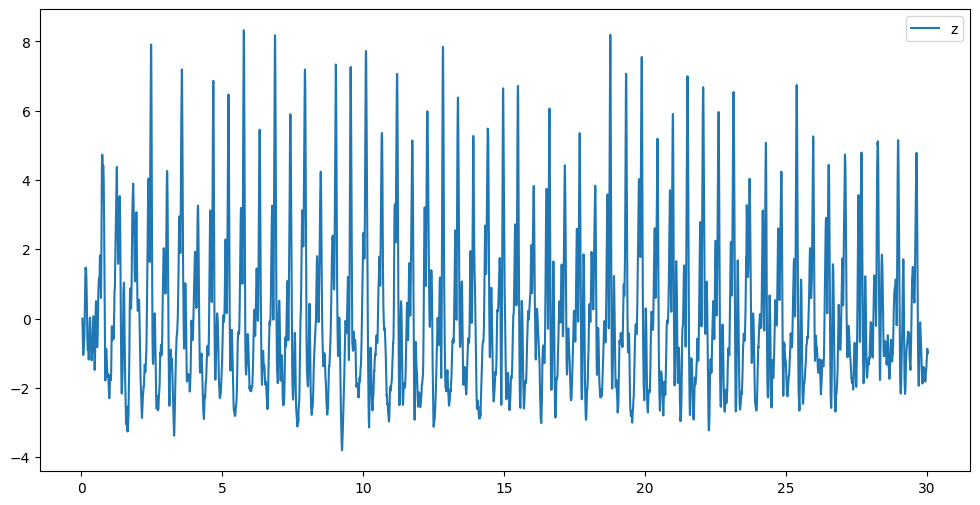

Time (s)                         90616.352287
Linear Acceleration x (m/s^2)     4870.201804
Linear Acceleration y (m/s^2)     6246.317935
Linear Acceleration z (m/s^2)    10311.802957
Absolute acceleration (m/s^2)    14637.927652
dtype: float64

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
#plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'])
#plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'])
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'])
#plt.plot(df['Time (s)'], df['Absolute acceleration (m/s^2)'])
plt.legend(['z'])
plt.show()
(df.abs()).sum()


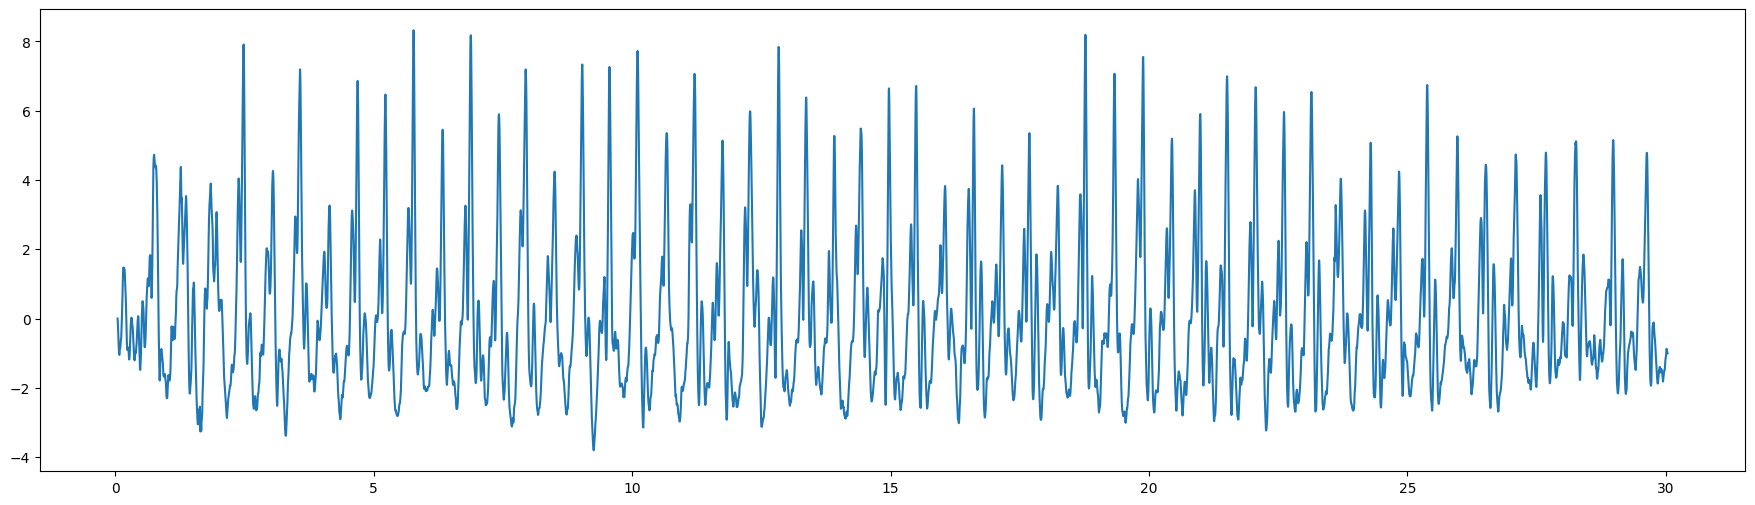

In [20]:
#valitaan analyysiin z-komponentti
fig = plt.figure(figsize=(22,6))
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'])
plt.show()

In [21]:
#Määritellään filtterit
from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

In [34]:
#Datan suodatus
noisy_signal = df['Linear Acceleration z (m/s^2)']

# Filtterin parametrit    
T= df['Time (s)'][len(df)-1] - df['Time (s)'][0]              # Koko datan pituus
n = int(len(df['Time (s)'])) # Näytteiden lukumäärä
fs = n/T                # Näytteenottotaajuus (oletetaan vakioksi)

cutoff = 1/(0.3)         # Alipäästösuodattimen taajuus, Hz
#cutoff2 = 1/(5)         # Ylipäästösuodattimen taajuus, Hz

nyq = 0.5 * fs          # Nyquistin taajuus
order = 1               # Kertaluku

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff, fs, nyq, order)
#highpass_filtered = butter_highpass_filter(noisy_signal, cutoff2, fs, nyq, order)


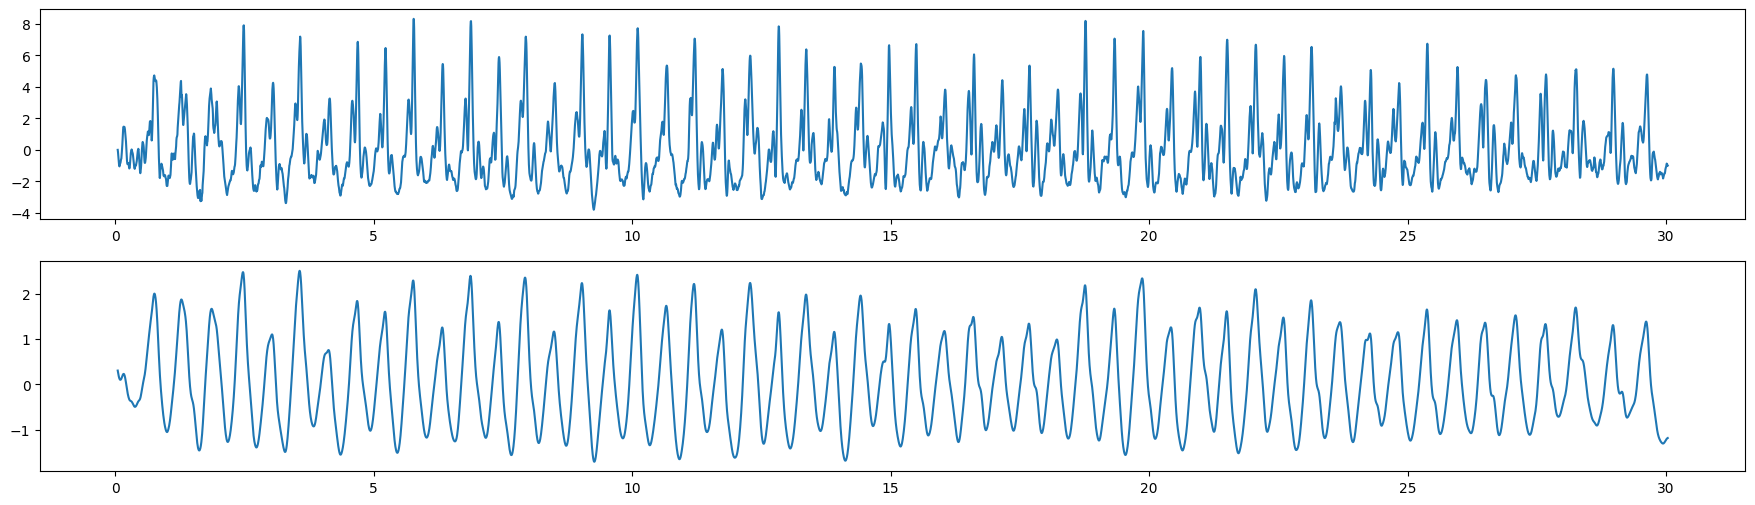

In [23]:
fig = plt.figure(figsize=(22,6))
plt.subplot(2,1,1)
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'])
plt.subplot(2,1,2)
plt.plot(df['Time (s)'], lowpass_filtered)
plt.show()

In [35]:
steps = 0
for i in range(lowpass_filtered.shape[0]-1):
    if lowpass_filtered[i]/lowpass_filtered[i+1] < 0:
        steps = steps + 0.5

print(steps)

54.5
